# 台灣銀行牌告匯率爬蟲

# 爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

In [3]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


美金(USD)



<Figure size 720x576 with 0 Axes>

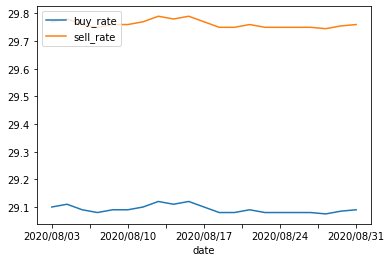


港幣(HKD)



<Figure size 720x576 with 0 Axes>

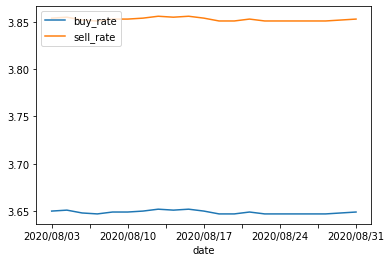


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

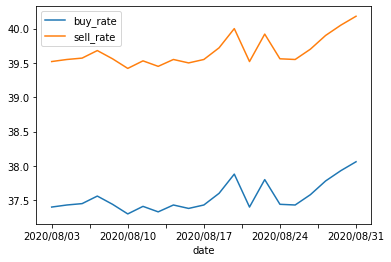


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

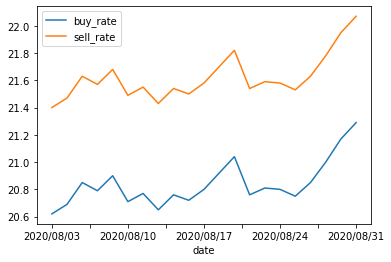


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

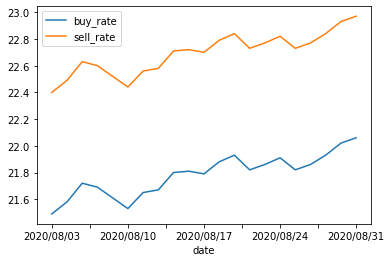


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

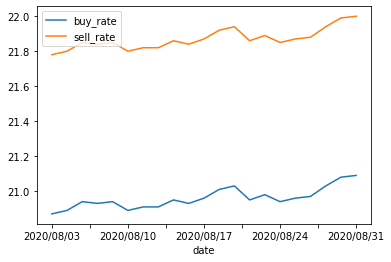


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

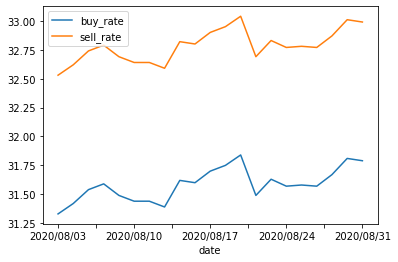


日圓(JPY)



<Figure size 720x576 with 0 Axes>

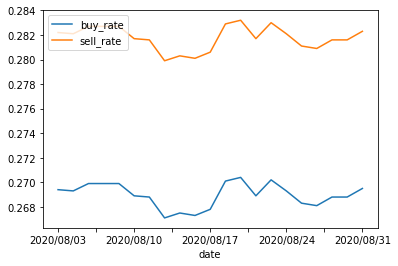


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

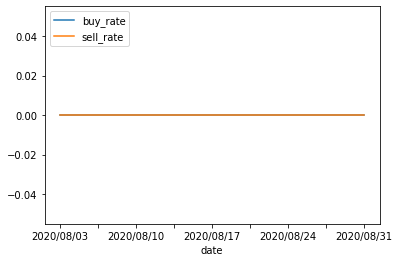


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

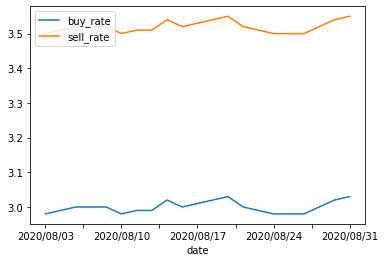


紐元(NZD)



<Figure size 720x576 with 0 Axes>

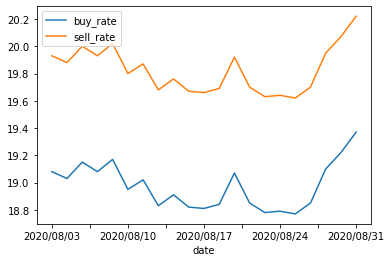


泰幣(THB)



<Figure size 720x576 with 0 Axes>

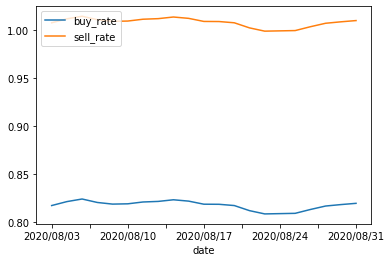


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

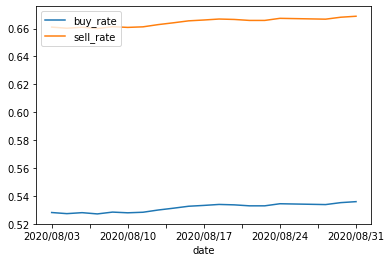


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

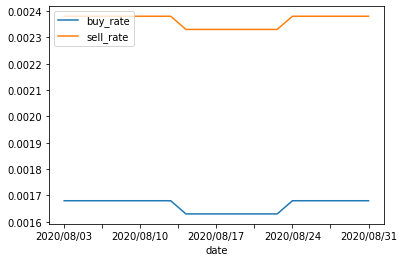


歐元(EUR)



<Figure size 720x576 with 0 Axes>

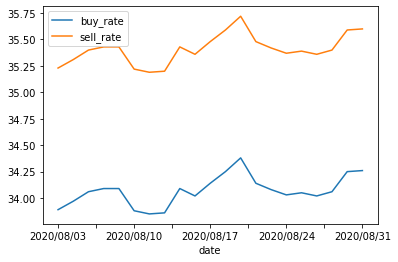


韓元(KRW)



<Figure size 720x576 with 0 Axes>

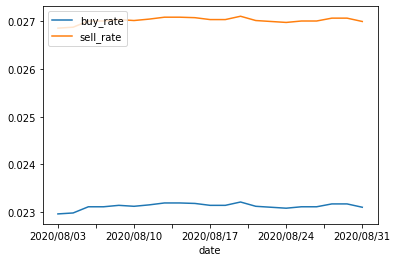


越南盾(VND)



<Figure size 720x576 with 0 Axes>

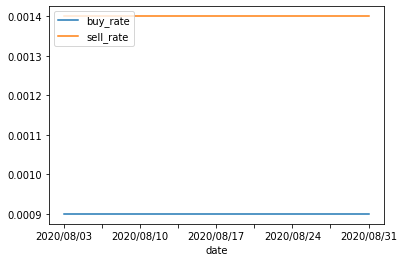


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

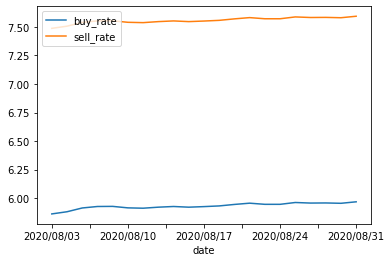


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

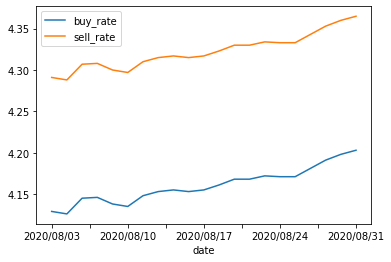

In [6]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
r = requests.get(url)
r.encoding = 'utf-8'
html = BeautifulSoup(r.text  , 'html5lib')

#先到牌告匯率首頁，爬取所有貨幣的種類
currency=html.find("tbody").find_all("tr")

#幣別資料
#print(currency[0])

#貨幣種類(總共19種)
for x in range(0, 18+1):
    print(currency[x].find('div',attrs={"class":"visible-phone print_hide"}).text.replace(" ",''))

# 針對不同幣別，找到其「歷史匯率」的首頁 
    history_link=currency[x].find("td",attrs={"data-table":"歷史匯率"})

#print(history_link.a['href'])
    history_rate_link="https://rate.bot.com.tw"+history_link.a['href']


#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
    quote_history_url = history_rate_link.replace("history", "quote/2020-08")
    resp=requests.get(quote_history_url)
    resp.encoding="utf-8"
    history=BeautifulSoup(resp.text , "lxml")

#   以上 決定 那些貨幣  , 日期
# -----------------------------------------------------------------------------------------------------------------------
#   以下 為主程式(擷取到歷史匯率資料  , 並且彙整資料和劃出趨勢圖)

    history_table=history.find("table",attrs={"title":"歷史本行營業時間牌告匯率"}).find(name='tbody').find_all(name='tr')
                                                        #這邊要加 tbody 不然會擷取到不要的 而且會讓底下 None
#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
    # 擷取日期資料 
        date_string = history_rate.a.get_text()
        date=datetime.strptime(date_string , '%Y/%M/%d' ).strftime('%Y/%M/%d') 
        date_history.append(date)  ## 日期歷史資料
    
        history_cash_rate=history_rate.find_all("td",attrs={"class":"rate-content-cash text-right print_table-cell"})
    #print(history_cash_rate)
        history_buy.append(float(history_cash_rate[0].string))  # float表示一下 就 float
        history_sell.append(float(history_cash_rate[1].string))
# 將匯率資料建成dataframe形式
#  2維陣列
    dataframe=pd.DataFrame({"date":date_history ,
                            "buy_rate":history_buy ,
                            "sell_rate":history_sell})
    dataframe = dataframe.set_index('date')
    dataframe = dataframe.sort_index(ascending=True)
#print(dataframe)
# 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10,8))
    dataframe[['buy_rate','sell_rate']].plot() # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")   
    plt.show()